# Seminar 5 - **Pandas og databehandling**
Til nå har vi sett på fundamentale prinsipper i Python, som variabler, funksjoner, lister, dictionaries og NumPy. I dette seminaret vil dere øve på bruk av biblioteket ```Pandas```, og hvordan vi kan bruke dette til behandling av data.

Øv på å bruke Google, forelesningsnotater og pseudokode for å løse oppgaven.

## 📌 Oppgave 1: Opprette en Pandas DataFrame
Opprett en DataFrame som inneholder informasjon om tre forskjellige produkter:

**Kolonner**: "Produkt", "Pris", "Lager"

**Data**:

* "Eple", 10 kr, 100 stk
* "Banan", 15 kr, 150 stk
* "Appelsin", 12 kr, 80 stk

Skriv ut hele DataFrame-en.

In [1]:
# Importerer biblioteket
import pandas as pd
dict1 = {'Produkt': ['Eple', 'Banan', 'Appelsin'],
         'Pris (kr)': [10, 15, 12],
         'Antall (stk)': [100, 150, 80]}
df = pd.DataFrame(dict1)
df


,Produkt,Pris (kr),Antall (stk)
0,Eple,10,100
1,Banan,15,150
2,Appelsin,12,80


In [4]:
#HER ER OPPGAVEN 1 LAGD SOM EN LISTE, ISTENDEN FOR DICT. FOR DE SOM ER NYSGJERRIG
 
# Lager en liste med info oppgitt i oppgaven
data = [
    ["Eple", 10, 100],
    ["Banan", 15, 150],
    ["Appelsin", 12, 50],
]
 
df1 = pd.DataFrame(data, columns=["Produkt", "Pris", "Lager"]) #Lager et DataFrame med kolonnenavne produkt, pris og lager.
 
display(df1) #display brukes for å få en visuell tabell
print(df1) #vises som en tabell uten skille men ren tekst.

,Produkt,Pris,Lager
0,Eple,10,100
1,Banan,15,150
2,Appelsin,12,50


    Produkt  Pris  Lager
0      Eple    10    100
1     Banan    15    150
2  Appelsin    12     50


## 📌 Oppgave 2: Filtrere Data i en DataFrame
Bruk DataFrame-en fra Oppgave 1.

Finn og skriv ut alle produkter med en pris over 12 kr.

In [2]:
df[df['Pris (kr)'] > 12]

,Produkt,Pris (kr),Antall (stk)
1,Banan,15,150


## 📌 Oppgave 3: Legge til en Ny Kolonne
Legg til en ny kolonne `Total verdi` i DataFrame-en. Den skal vise **pris × lager** for hvert produkt.


In [5]:
df['Total verdi (kr)'] = df['Pris (kr)']*df['Antall (stk)']
df

,Produkt,Pris (kr),Antall (stk),Total verdi (kr)
0,Eple,10,100,1000
1,Banan,15,150,2250
2,Appelsin,12,80,960


## 📌 Oppgave 4: Laste Inn Data fra en CSV-fil
Last inn csv-filen som heter `StudentPerformanceFactors.csv` fra data mappen til kurset. Den finner dere [her](insert link).

Print ut de første fem radene av  dataene ved hjelp av funksjonen

```python
    df.head()
```

In [2]:
df1 = pd.read_csv('StudentPerformanceFactors.csv')
df1.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [7]:
df1.shape

(6607, 20)

## 📌 Oppgave 5: Finn Gjennomsnittlig Eksamensscore
Bruk `Pandas` til å finne **gjennomsnittlig eksamensscore** for hele datasettet.

In [8]:
df1['Exam_Score'].mean()

67.23565914938702

## 📌 Oppgave 6: Tell Antall Elever med og uten Internett
Bruk Pandas til å finne ut hvor mange elever som har tilgang til internett og hvor mange som ikke har det.

Da vil du ha bruk for funksjonen ```value_counts``` til Pandas.

In [11]:
df1['Internet_Access'].value_counts()

Internet_Access
Yes    6108
No      499
Name: count, dtype: int64

## 📌 Oppgave 7: Histogram over Studietimer
Vis hvor mange elever som går på **Public** vs. **Private** skoler ved å lage et histogram vha Pandas.

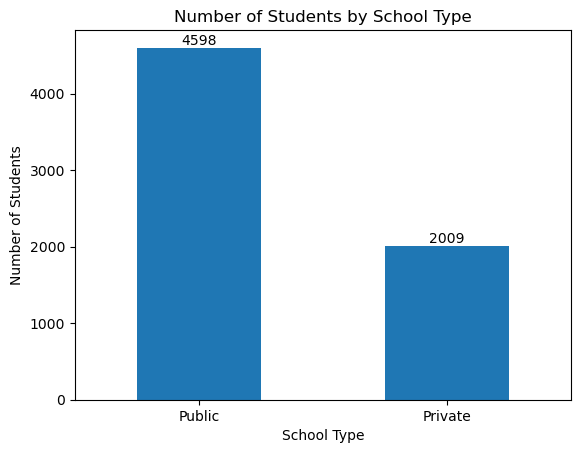

In [15]:
#Denne funker: import matplotlib.pyplot as plt
school_type_counts = df1['School_Type'].value_counts()
school_type_counts.plot(kind='bar', title='Number of Students by School Type', ylabel='Number of Students', xlabel='School Type', rot=0)
for index, value in enumerate(school_type_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

<Axes: xlabel='School_Type'>

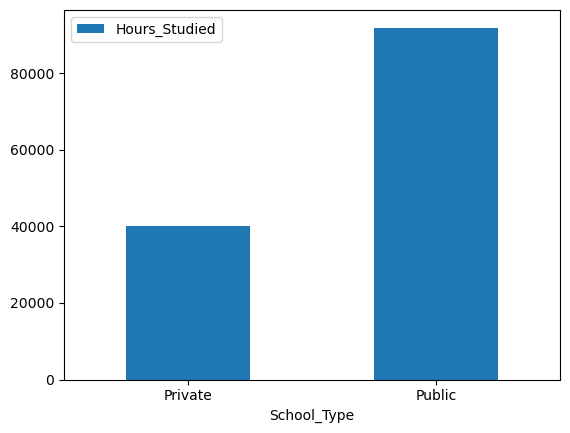

In [23]:
dfst = df1.groupby('School_Type').sum()
dfst.plot.bar(y='Hours_Studied', rot=0)

## 📌 Oppgave 8: Utforsk Dataene med Pandas
I denne oppgaven skal du bruke Pandas' innebygde metoder for å undersøke datasettet om studentenes og deres vaner.

### **a) Sjekk informasjon om datasettet**
Bruk Pandas til å vise en oversikt over kolonner, datatyper og manglende verdier.

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

### **b) Vis de første 5 radene i datasettet**
Se hvordan dataene ser ut ved å hente ut de første radene.

In [4]:
df1.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### **c) Finn antall rader og kolonner**
Bruk Pandas for å finne ut hvor mange rader og kolonner datasettet inneholder.

In [6]:
df1.shape

(6607, 20)

### **d) Sjekk om det finnes manglende verdier**
Finn ut om noen kolonner har **NaN**-verdier.

In [18]:
df1.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

### **e) Beskriv datasettet med statistikk**
Få et raskt overblikk over numeriske kolonner. Bruk `describe()` funksjonen til Pandas. Hva kan finner vi ut her?

In [7]:
df1.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000
